# 미국 Major League 데이터 분석

baseball.csv 파일을 오늘 배운 것들을 활용하여 분석해보자.

### 데이터

baseball.csv

데이터 : 1962~2012년 MLB 야구 팀들의 성적 데이터

  
컬럼 설명 :

<pre>

* G : 게임수
  
* W : 승수

* T : 무승부(tie)
  
* D : 패배(Depeat)
  
* WR : 승률
  
* PW : 기대승률(피타고라스 승률?)
  
* R/G : 게임당 득점
  
* RS : 총 득점
  
* RA : 총 실점
  
* BA : 타율
  
* OBP : 출루율
  
* SLG : 장타율
  
* OOBP : 상대의 출루율
  
* OSLG : 상대의 장타율
  
</pre>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
baseball = pd.read_csv('baseball.csv')

In [5]:
print(baseball.shape)
print(baseball.info())
print(baseball.describe())
print(baseball.columns)
print(baseball.isnull().sum())

(1232, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB
None
              Year           RS  ...        OOBP        OSLG
count  1232.000000  1232.000000  ...  420.000000  420.000000
mean   1988.957792   715.081981  ...    0.332264    0.419743
std      14.819625    91.534294  ...    0.015295    0.026510
min    1962.00000

In [6]:
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


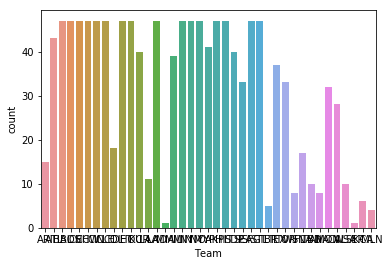

In [7]:
sns.countplot(x='Team', data=baseball)

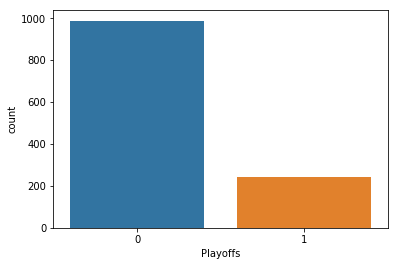

In [8]:
sns.countplot(x='Playoffs', data=baseball)

In [12]:
baseball.groupby('Playoffs').mean()[['RS', 'RA','W']]

,RS,RA,W
Playoffs,,,
0,697.502024,727.172065,77.393725
1,786.266393,666.127049,95.118852


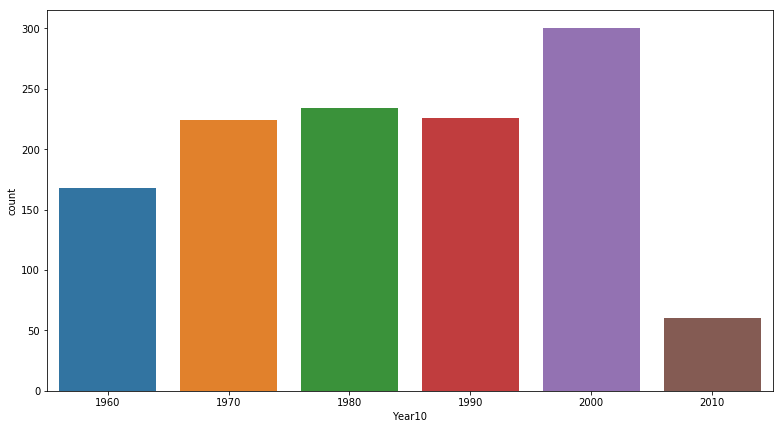

In [18]:
# baseball.groupby('Year').mean()
bins = [1962, 1970,1980,1990,2000,2010,np.inf]
labels = ['1960','1970','1980','1990','2000','2010']
baseball['Year10'] = pd.cut(baseball['Year'], bins,labels=labels)
baseball['Year10'].head()

fig = plt.figure(figsize=(13, 7))
sns.countplot(x='Year10', data=baseball)
plt.show()

In [14]:
baseball.groupby('League').mean()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
League,,,,,,,,,,,,,
AL,1988.464286,732.399351,730.495130,81.034091,0.328545,0.402635,0.261308,0.198052,2.983607,2.704918,161.853896,0.333010,0.423077
NL,1989.451299,697.764610,699.668831,80.774351,0.324117,0.392049,0.257237,0.198052,3.262295,2.729508,161.983766,0.331612,0.416826
